# Random variables and Distributions: Zipf (or Pareto)

Name: Arthur Pontes Nader

## Libraries

In [2]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import math

## Zipf distibution

The probability mass function of the Zipf distribution is given by:

$$
P(X = k) = \frac{C}{k^{1+\alpha}}
$$

where C is a constant chosen so that the probabilities add up to 1. The probability decreases according to a power of k (different from Poisson and Geometric, where it decreases exponentially)

In [25]:
def zipf(alpha, k):
    
    return stats.zipf.pmf(k, alpha), stats.zipf.cdf(k, alpha)

Let's observe the graphs for some values of alpha: 0.5, 1 and 2

In [26]:
alphas = [1.5, 2, 3] # in stats.zipf the formula is just alpha instead of 1+alpha
k = np.arange(0, 21)

In [27]:
probs, cdfs = [], []
for a in alphas:
    prob, cdf = zipf(a, k)
    probs.append(prob)
    cdfs.append(cdf)

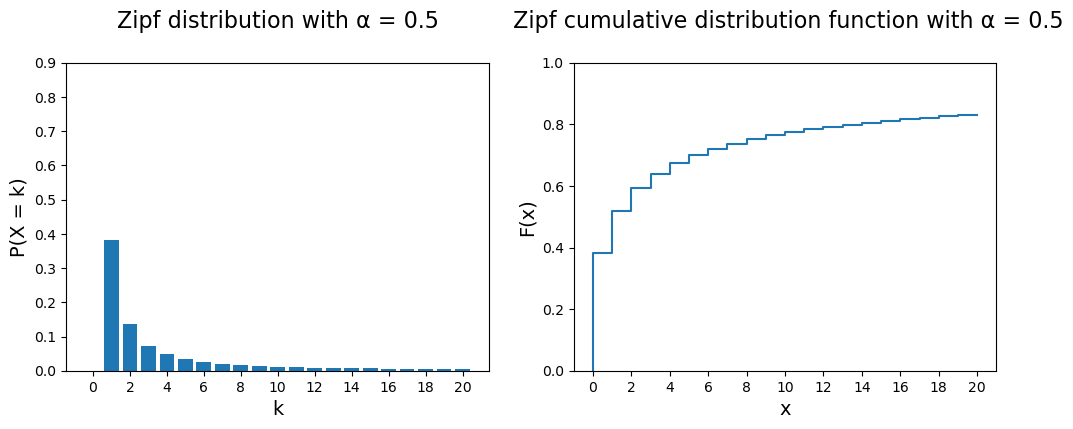

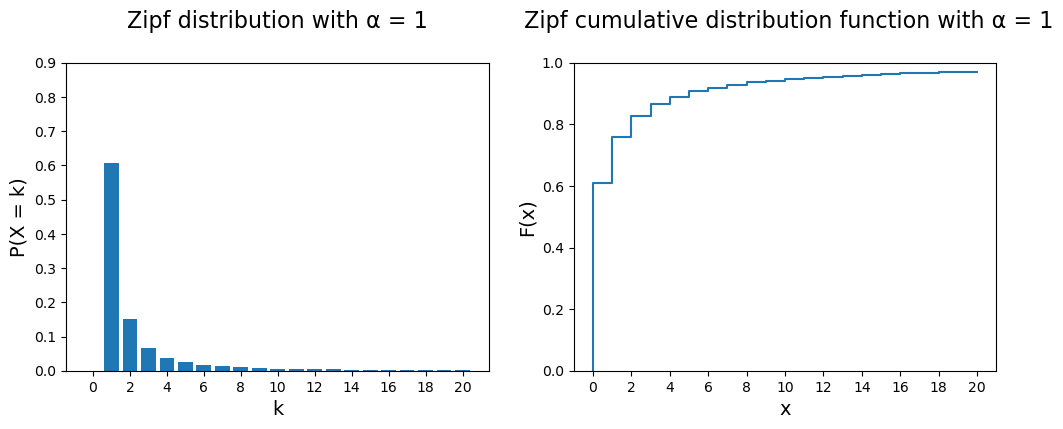

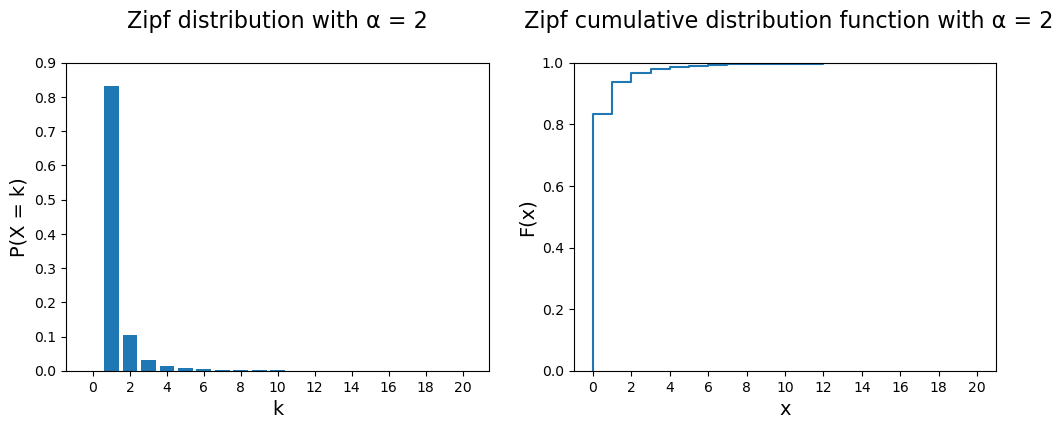

In [28]:
for i in range(len(alphas)):

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    ax[0].bar(valores_x, probs[i])
    ax[0].set_title(f"Zipf distribution with α = {alphas[i] - 1 }\n", fontsize = 16)
    ax[0].set_xlabel("k", fontsize = 14)
    ax[0].set_ylabel("P(X = k)", fontsize = 14)
    ax[0].set_ylim(0, 0.9)
    ax[0].set_xticks(np.arange(0, 21, 2))

    ax[1].step(valores_x, cdfs[i])
    ax[1].set_title(f" Zipf cumulative distribution function with α = {alphas[i] - 1}\n", fontsize = 16)
    ax[1].set_xlabel("x", fontsize = 14)
    ax[1].set_ylabel("F(x)", fontsize = 14)
    ax[1].set_ylim(0, 1)
    ax[1].set_xticks(np.arange(0, 21, 2))

    plt.show()

Approximations for expected values:

In [31]:
np.dot(probs, k)

array([2.90741337, 2.18716344, 1.32785997])

See how a greater value for alpha lead to a less heavy-tailed distribution. Now, let's observe the behavior of the ratios of consecutive probabilities

In [18]:
def calculate_ratios(vetor, a):
    
    print("Ratios between probabilities:")
    for i in range(1, len(vetor)-1):
        print(round(vetor[i+1]/vetor[i], 3), end = ", ")
        
    print("\nRatios between k:")
    for k in range(1, len(vetor)-1):
        print(round(np.power(k/(k+1), 1+a), 3), end = ", ")

For alpha = 0.5:

In [19]:
calculate_ratios(probs[0], 0.5)

Ratios between probabilities:
0.354, 0.544, 0.65, 0.716, 0.761, 0.794, 0.818, 0.838, 0.854, 0.867, 0.878, 0.887, 0.895, 0.902, 0.908, 0.913, 0.918, 0.922, 0.926, 
Ratios between k:
0.354, 0.544, 0.65, 0.716, 0.761, 0.794, 0.818, 0.838, 0.854, 0.867, 0.878, 0.887, 0.895, 0.902, 0.908, 0.913, 0.918, 0.922, 0.926, 

For alpha = 1:

In [20]:
calculate_ratios(probs[1], 1)

Ratios between probabilities:
0.25, 0.444, 0.562, 0.64, 0.694, 0.735, 0.766, 0.79, 0.81, 0.826, 0.84, 0.852, 0.862, 0.871, 0.879, 0.886, 0.892, 0.898, 0.902, 
Ratios between k:
0.25, 0.444, 0.562, 0.64, 0.694, 0.735, 0.766, 0.79, 0.81, 0.826, 0.84, 0.852, 0.862, 0.871, 0.879, 0.886, 0.892, 0.898, 0.902, 

For alpha = 2:

In [21]:
calculate_ratios(probs[2], 2)

Ratios between probabilities:
0.125, 0.296, 0.422, 0.512, 0.579, 0.63, 0.67, 0.702, 0.729, 0.751, 0.77, 0.787, 0.801, 0.813, 0.824, 0.834, 0.842, 0.85, 0.857, 
Ratios between k:
0.125, 0.296, 0.422, 0.512, 0.579, 0.63, 0.67, 0.702, 0.729, 0.751, 0.77, 0.787, 0.801, 0.813, 0.824, 0.834, 0.842, 0.85, 0.857, 

You can notice that as the value of k increases, the probabilities decay very slowly, almost nothing when k is very large.

How can I identify if my data comes from a zipf distribution? After calculating the value of C, look at the graph:

In [33]:
def calculate_C(alpha, n):
    
    valor = [1/np.power(n, 1+alpha) for n in range(1, 100)]
    soma = np.sum(valor)
    C = 1/soma
    
    return C

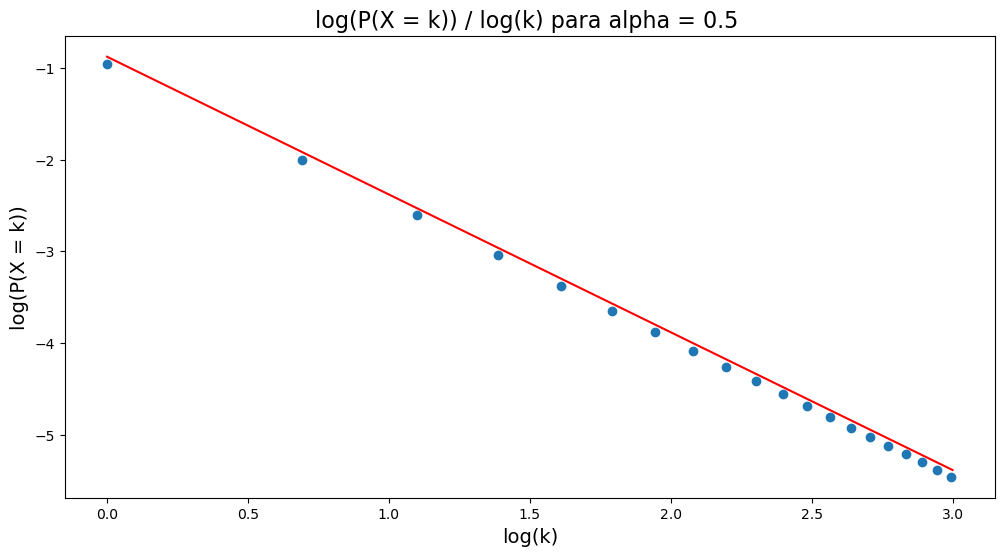

In [34]:
alpha = 0.5
C = calculate_C(alpha, 100)

x = np.arange(4)
y = [-(1+alpha)*i + np.log(C) for i in x]

plt.figure(figsize=(12, 6))
plt.scatter(np.log(valores_x[1:]), np.log(probs[0][1:]))
plt.plot(x, y, color = "red")
plt.title("log(P(X = k)) / log(k) para alpha = 0.5 ", fontsize = 16)
plt.xlabel("log(k)", fontsize = 14)
plt.ylabel("log(P(X = k))", fontsize = 14)
plt.show()

Since the Zipf distribution follows a power law, the graph of points (log(k), log(P(X=k))) is expected to present a linear relationship. The intercept will be log(C)

In [35]:
C

0.41461534021923413

In [36]:
np.log(C)

-0.8804040796185506

## Simulating Zipf values using Monte Carlo

In [63]:
def rzipf(nsim=1, alpha=1, Cte=1/1.645):
    
    res = np.zeros(nsim)
    
    for i in range(nsim):
        x = -1
        k = 1
        F = p = Cte
        U = np.random.uniform()
        
        while x == -1:
            
            if U < F:
                x = k
            else:
                p = p * ((k / (k+1)) ** (1+alpha))
                F = F + p
                k += 1

        res[i] = x
    
    return res

For alpha = 0.5:

In [64]:
C_05 = calculate_C(0.5, 100)
values_05 = rzipf(400, 0.5, C_05)
print("Maximum in each of the 3 simulations:", max(values_05), max(rzipf(400, 0.5, C_05)), max(rzipf(400, 0.5, C_05)))

Maximum in each of the 3 simulations: 92.0 84.0 93.0


In [68]:
values_05[:50]

array([ 8.,  7.,  4.,  6.,  1.,  1.,  7.,  4.,  1.,  6.,  2.,  1.,  2.,
       11.,  1.,  5.,  1.,  3., 10.,  8.,  2., 25.,  2.,  1., 19.,  1.,
        4., 10.,  5., 20.,  1.,  1., 71.,  1.,  1.,  2.,  5.,  1.,  1.,
        1.,  2., 11., 13.,  1., 12.,  1.,  1., 18.,  7.,  1.])

For alpha = 1:

In [65]:
C_1 = calculate_C(1, 100)
values_1 = rzipf(400, 1, C_1)
print("Maximum in each of the 3 simulations:", max(values_1), max(rzipf(400, 1, C_1)), max(rzipf(400, 1, C_1)))

Maximum in each of the 3 simulations: 64.0 64.0 88.0


In [69]:
values_1[:50]

array([ 1.,  1.,  2.,  1.,  1.,  2.,  1.,  1.,  1.,  1., 32.,  1.,  1.,
        1.,  4.,  1.,  6.,  1.,  1.,  1.,  1.,  2.,  4.,  8.,  2.,  3.,
        1.,  1.,  1.,  1.,  1.,  1.,  2.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  2.,  7.,  1., 11.,  1.,  1.,  1., 12.,  1.,  1.])

For alpha = 2:

In [66]:
C_2 = calculate_C(2, 100)
values_2 = rzipf(400, 2, C_2)
print("Maximum in each of the 3 simulations:", max(values_2), max(rzipf(400, 2, C_2)), max(rzipf(400, 2, C_2)))

Maximum in each of the 3 simulations: 27.0 15.0 20.0


In [70]:
values_2[:50]

array([2., 2., 2., 2., 1., 1., 1., 1., 1., 5., 1., 1., 2., 1., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1.,
       1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1.])

Check that although most values fall within a limited range, extremely large ones (relative to others) are generated easily.